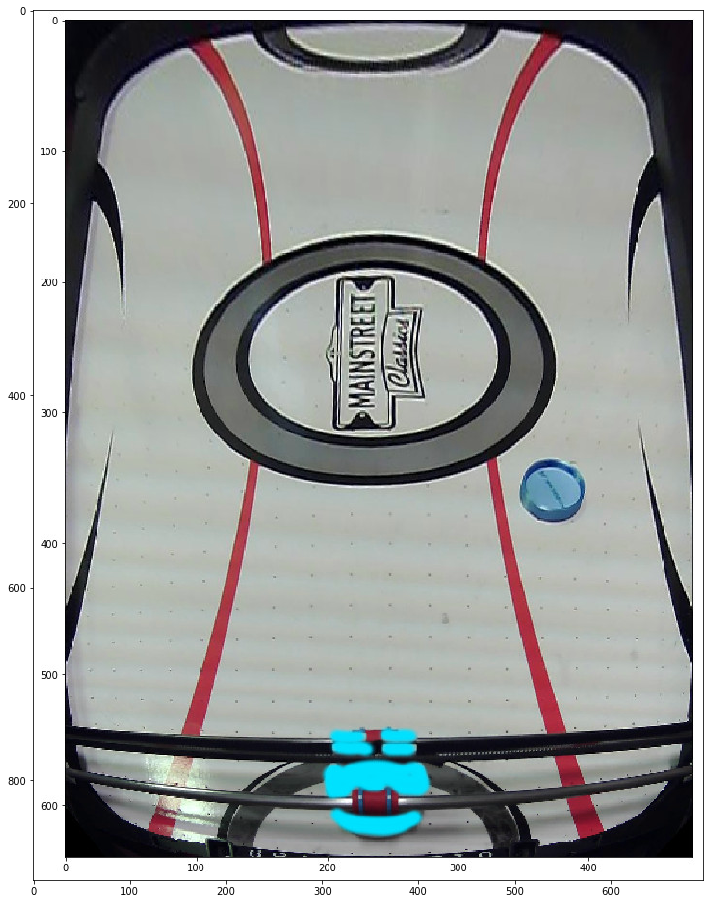

In [148]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

def show_img(image):
    plt.figure(figsize=(16,16))
    plt.imshow(image)

image=cv2.imread("homography_4_yellowbot.jpg")
orig = image.copy()
show_img(image)

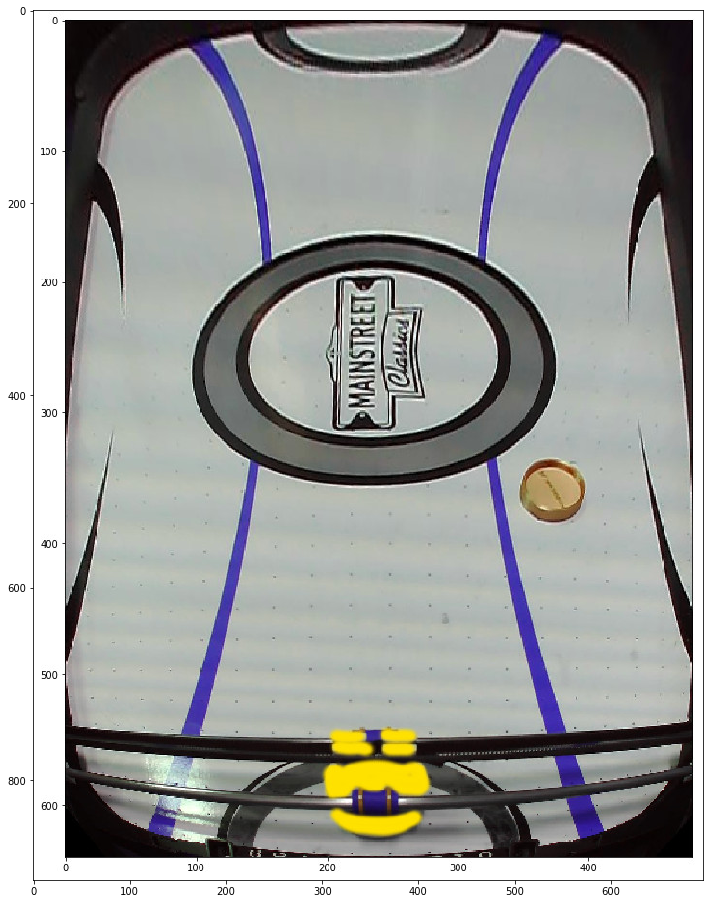

In [149]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_img(rgb)

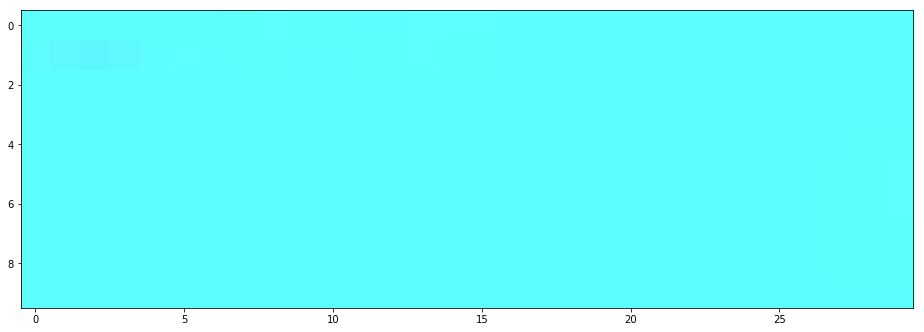

In [156]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
show_img(hsv[790:800,320:350,:])

In [157]:
hsv[790:800,320:350,:]

array([[[ 93, 255, 252],
        [ 93, 255, 252],
        [ 93, 255, 253],
        [ 93, 255, 253],
        [ 93, 255, 253],
        [ 93, 255, 253],
        [ 93, 255, 252],
        [ 93, 255, 251],
        [ 94, 255, 252],
        [ 93, 255, 253],
        [ 93, 255, 253],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 255],
        [ 93, 255, 255],
        [ 93, 255, 255],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254],
        [ 93, 255, 254]],

       [[ 94, 252, 253],
        [ 94, 248, 253],
        [ 94, 246, 253],
        [ 94, 248, 253],
        [ 94, 253, 254],
        [ 93, 255, 255],
        [ 93, 255, 254],
        [ 93, 255, 253],
        [ 93, 255, 253],
        [ 93, 255, 254]

In [159]:
botlowerBound=np.array([89,250,250])
botupperBound=np.array([95,255,255])

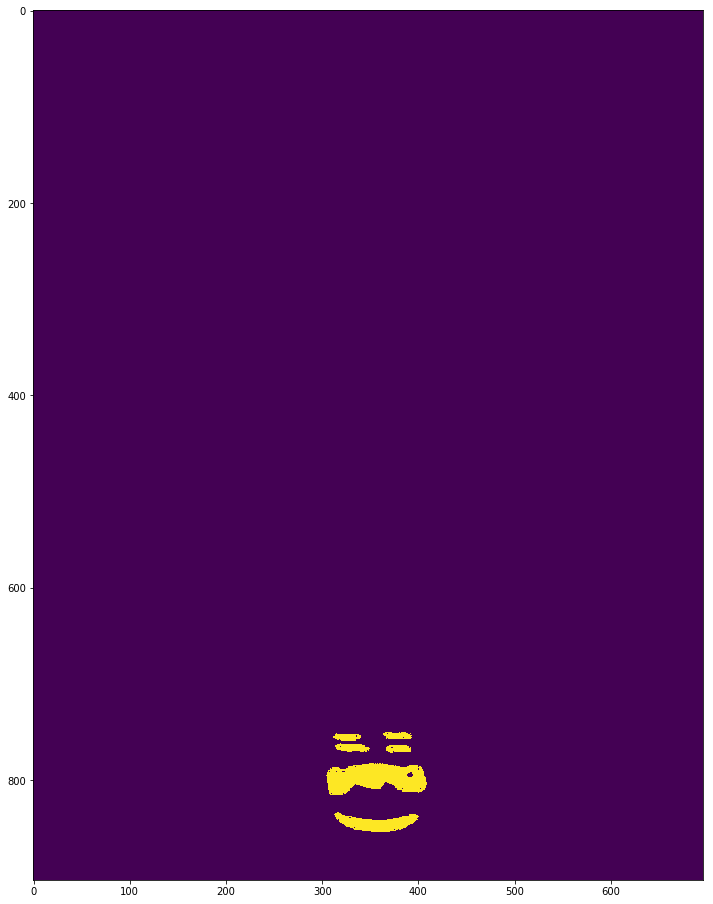

In [160]:
mask=cv2.inRange(hsv,botlowerBound,botupperBound)
show_img(mask)

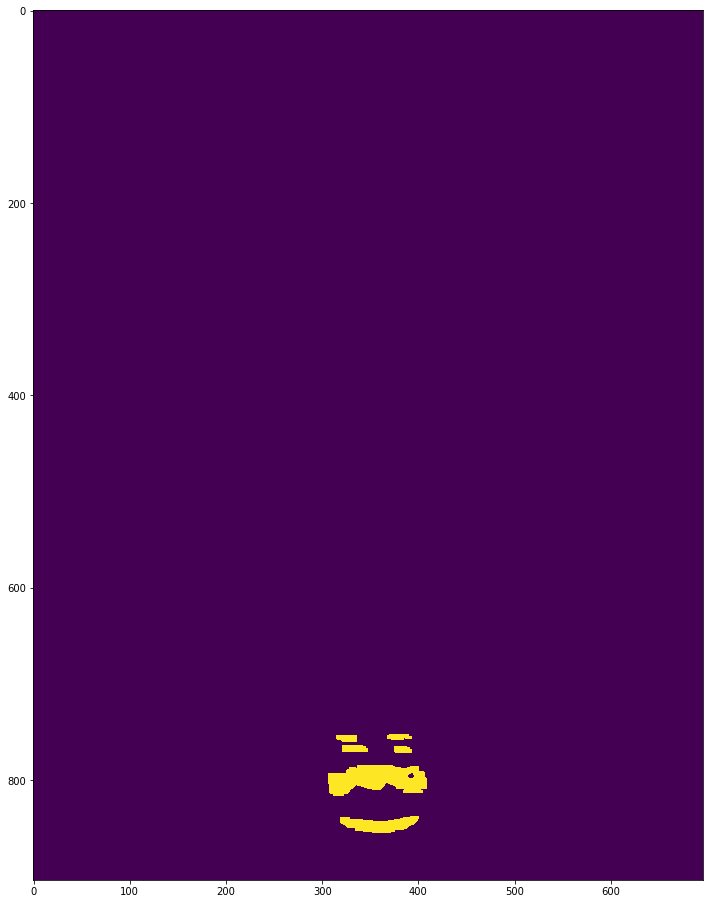

In [161]:
# we only want large objects since we are trying to detect
# the board. 1x60 is a good starting point. Can call again
# with override if the result is not good enough.
# this cleans up the outside noise
opened=cv2.morphologyEx(mask,cv2.MORPH_OPEN, np.ones((4,8)))
show_img(opened)

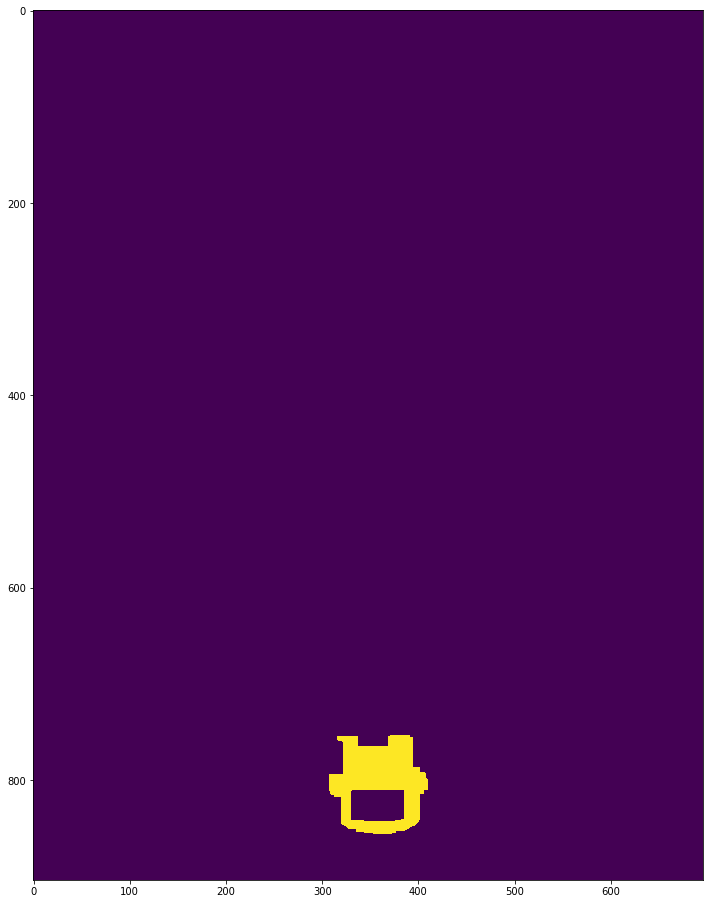

In [163]:
# this cleans up the noise on the inside and reduces the number of
# objects.
closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((30,30)))
show_img(closed)

In [164]:
_, contours, _=cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE);

In [165]:
len(contours)

1

In [166]:
xs, ys = np.where(closed > 0)
pts = np.array(zip(ys, xs))

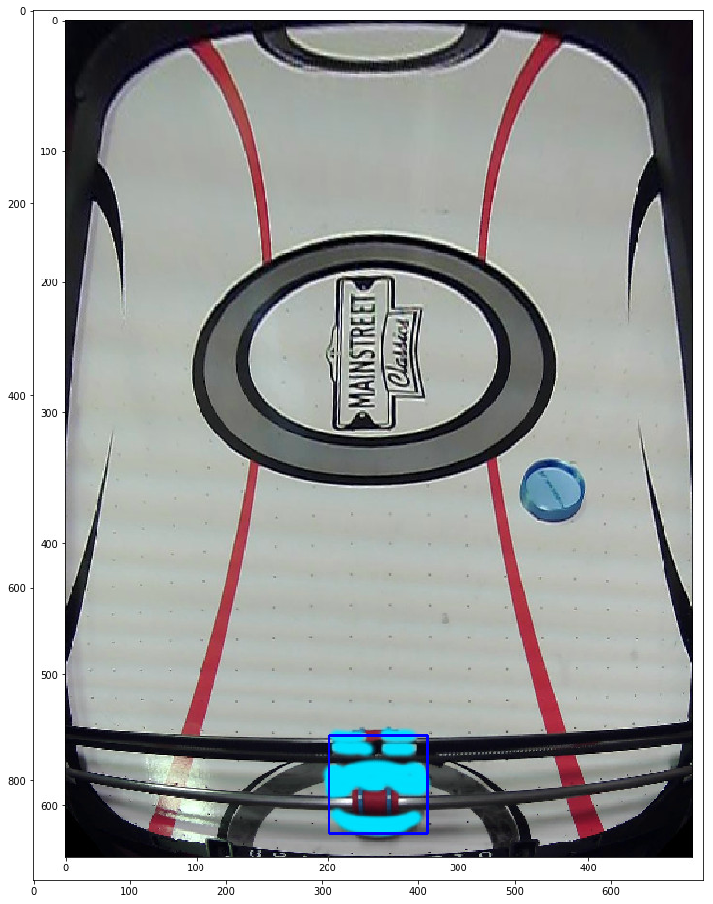

In [167]:
rect = cv2.minAreaRect(pts)
box = cv2.boxPoints(rect)
box = np.int0(box)

disp_img = image.copy()
cv2.drawContours(disp_img,[box],0,(0,0,255),2)
show_img(disp_img)

In [168]:
# convert points to tuple
rect_bot_left=tuple(box[0])
rect_top_left=tuple(box[1])
rect_top_right=tuple(box[2])
rect_bot_right=tuple(box[3])

In [169]:
center_x = rect_top_left[0] + ((rect_top_right[0] - rect_top_left[0])/2)
center_y = rect_top_left[1] + ((rect_bot_right[1] - rect_top_left[1])/2)

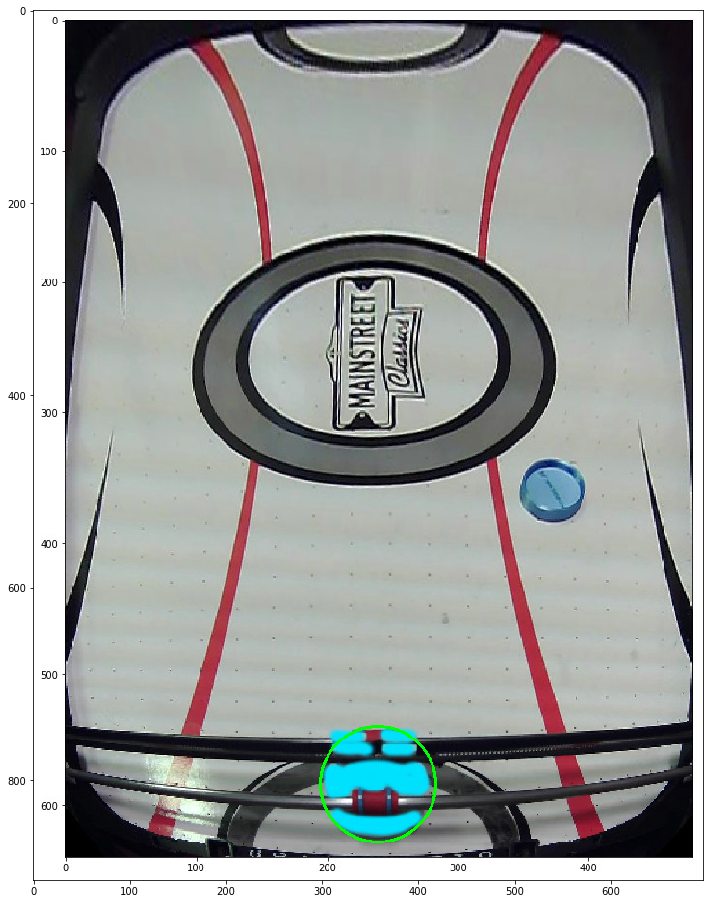

In [171]:
disp_img = image.copy()
img = cv2.circle(disp_img, (int(center_x), int(center_y)), 60, (0,255,0), 2)
show_img(disp_img)